In [ ]:
# Analyse de données
import pandas as pd
import numpy as np
from datetime import datetime
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
# Standardisation
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
# Découpage du dataset
from sklearn.model_selection import train_test_split
# Modélisation
from sklearn.linear_model import LinearRegression
# métriques
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [49]:
df = pd.read_csv('data/carData_cleaned.csv')

## Nettoyage et préparation des données

In [64]:
# Standardisation de Present_Price
scaler = StandardScaler()
df[['Present_Price_Std']] = scaler.fit_transform(df[['Present_Price']])

## Selection de la variable à expliquer

In [65]:
# Target
y = df["Selling_Price"]

## Selection de la variable explicative

In [67]:
# features BRUT et STANDARDISE
X = df[['Present_Price']]
X_std = df[['Present_Price_Std']]

## Division du dataset : jeu d'entrainement, jeu de test

In [69]:
# Jeu d'entraînement et de test BRUT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Jeu d'entraînement et de test STANDARDISE
X_std_train, X_std_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

## Entrainement du modèle

In [71]:
# Modèle BRUT
lin_reg = LinearRegression()
# Modèle STANDARDISE
lin_reg_std = LinearRegression()

# Entrainement BRUT
lin_reg.fit(X_train, y_train)
# Entrainement STANDARDISE
lin_reg_std.fit(X_std_train, y_train)

LinearRegression()

## Prédiction

In [72]:
# Prédictions BRUT
y_pred = lin_reg.predict(X_test)
# Prédictions STANDARDISE
y_std_pred = lin_reg_std.predict(X_std_test)


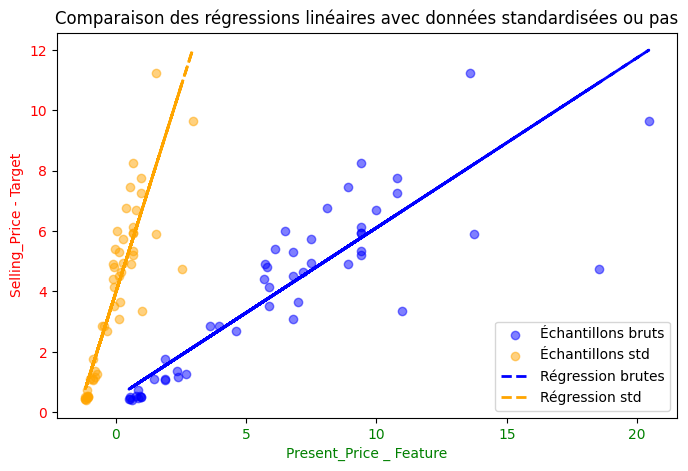

In [75]:
plt.figure(figsize=(8, 5))

# Jeu de test
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label="Échantillons bruts")
plt.scatter(X_std_test, y_test, color='orange',alpha=0.5 , label="Échantillons std")

# Droite de régression BRUT
plt.plot(X_test, y_pred, '--', color='blue', linewidth=2, label="Régression brutes")

# Droite de régression STANDARDISE
plt.plot(X_std_test, y_std_pred, '--', color='orange', linewidth=2, label="Régression std")

# Labels et titre
plt.xlabel("Present_Price _ Feature", color="green")
plt.xticks(color="green")
plt.ylabel("Selling_Price - Target", color="red")
plt.yticks(color="red")
plt.title("Comparaison des régressions linéaires avec données standardisées ou pas")
plt.legend()


## Métriques

Métriques avant standardisation :<br>
MAE: 1.8068994272334893, MSE: 7.202032610310123, RMSE: 2.6836603008410216

In [80]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae_std = mean_absolute_error(y_test, y_std_pred)
mse_std = mean_squared_error(y_test, y_std_pred)
rmse_std = np.sqrt(mse_std)
r2_std = r2_score(y_test, y_std_pred)

print(f"Données brutes\nMAE: {mae}, MSE: {mse}, RMSE: {rmse}, R²: {r2}\nDonnées standardisée\nMAE: {mae_std}, MSE: {mse_std}, RMSE: {rmse_std}, R2 {r2_std}")


Données brutes
MAE: 0.9381862581515366, MSE: 2.0155180468443064, RMSE: 1.41968941914924, R²: 0.7214621526846328
Données standardisée
MAE: 0.9381862581515369, MSE: 2.015518046844305, RMSE: 1.4196894191492395, R2 0.721462152684633
